In [1]:
import sys
sys.path.append(r'C:\PythonVenv\PaintByNumber\Lib\site-packages')
import cv2, numpy as np, matplotlib.pyplot as plt

In [51]:
def load_image(_i_path):
    return cv2.imread(_i_path)

def natural_color(_i):
    return cv2.cvtColor(_i, cv2.COLOR_BGR2RGB)

def lab_color(_i):
    return cv2.cvtColor(_i, cv2.COLOR_BGR2LAB)

def bgr_color(_i): # from rgb
    return cv2.cvtColor(_i, cv2.COLOR_RGB2BGR)

def display_image(_i):
    plt.imshow(_i)
    plt.colorbar()
    plt.show()
    
def save_image(_i, _i_path):
    cv2.imwrite(_i_path, _i)
    
def unique_colors(_im, return_counts=False):
    return np.unique(
        _im.reshape(-1, _im.shape[2]),
        axis=0,
        return_counts=return_counts
    )

def blur(_im, radius=5):
    return cv2.blur(_im, (radius, radius))

def invert(_im):
    return np.logical_not(_im)

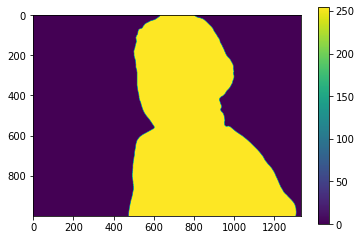

2


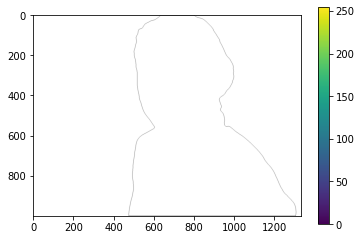

In [3]:
# contours proof of concept with binary image
image = cv2.imread('mask_full_smooth.png')
mask = np.ones(image.shape, dtype=np.uint8) * 255
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image(gray)
cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(cnts))
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(mask, [c], -1, (0, 0, 0), thickness=1)
display_image(mask)

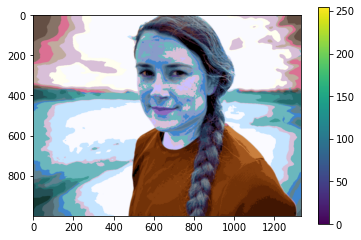

In [4]:
image = cv2.imread("emily_back_seg30_mapped.png")
display_image(image)

In [5]:
orig_colors, orig_counts = unique_colors(natural_color(image),return_counts=True)

In [6]:
colors_and_counts = {tuple(orig_colors[_i]): orig_counts[_i] for _i in range(len(orig_colors))}

In [7]:
def print_color(color_rgb):
    import matplotlib.pyplot as plt
    plt.imshow([[color_rgb]])

def our_rgb_paints():
    import matplotlib
    emily_colors = {
        1: "mediumorchid",
        2: "black",
        3: "orange",
        4: "deepskyblue",
        5: "palegreen",
        6: "navy",
        7: "mintcream",
        8: "azure",
        9: "seagreen",
        10: "salmon",
        11: "mistyrose",
        12: "mediumaquamarine",
        13: "yellow",
        14: "darkkhaki",
        15: "snow",
        16: "peru",
        17: "gold",
        18: "bisque",
        19: "red",
        20: "orchid",
        21: "blueviolet",
        22: "mediumpurple",
        23: "thistle",
        24: "pink",
    }
    return {
        k: [255 * _c for _c in matplotlib.colors.to_rgb(v)]
        for k, v in emily_colors.items()
    }

our_rgb = our_rgb_paints()

In [8]:
from math import sqrt

def closest_color_rgb(rgb, color_set):
    #https://en.wikipedia.org/wiki/Color_difference#sRGB #fascinating stuff
    r, g, b = rgb
    color_diffs = []
    for rgb_ in color_set:
        r_, g_, b_ = rgb_
        color_diff = sqrt(.3*(r - r_)**2 + .59*(g - g_)**2 + .11*(b - b_)**2)
        color_diffs.append((color_diff, rgb_))
    return min(color_diffs)[1], min(color_diffs)[0]

In [9]:
def replace_color(array, initial, final):
    r1, g1, b1 = initial
    r2, g2, b2 = final
    red, green, blue = array[:,:,0], array[:,:,1], array[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    array[:,:,:3][mask] = [r2, g2, b2]

(4, 33, 85)
63
[0.0, 0.0, 128.0]
29.166761904606414
 
(6, 46, 108)
45
(4, 33, 85)
12.613484847574837
 
(10, 54, 121)
55
(6, 46, 108)
7.819846545808939
 
(16, 64, 134)
100
(10, 54, 121)
9.401595609256974
 
(19, 18, 60)
16
[0.0, 0.0, 0.0]
26.371575607081198
 
(19, 33, 85)
11
(4, 33, 85)
8.215838362577491
 


C:\Users\silas.frantz\AppData\Local\Temp\ipykernel_30324\3388808548.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  color_diff = sqrt(.3*(r - r_)**2 + .59*(g - g_)**2 + .11*(b - b_)**2)


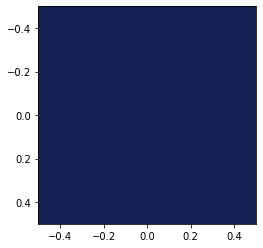

In [11]:
count_thresh = 2000
available_colors = list(our_rgb.values())
distance_thresh = 1
iterations = 0
for color, count in colors_and_counts.items():
    if color in available_colors:
        print("found color")
    elif count<count_thresh:
        iterations += 1
        closest_color, color_distance = closest_color_rgb(color, available_colors)
        if color_distance>distance_thresh:
            available_colors.append(color)
        else:
            print("found match")
        print(color)
        print(count)
        print(closest_color)
        print(color_distance)
        print(" ")
        if iterations > 5:
            break

print_color(color)

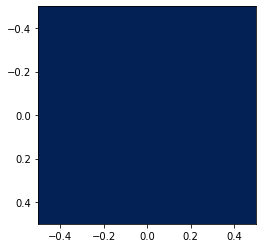

In [12]:
print_color(closest_color)

In [13]:
fore = natural_color(load_image("_color_correction/fore.png"))
back = natural_color(load_image("_color_correction/back.png"))

fore_colors = unique_colors(fore)
back_colors = unique_colors(back)

print(len(fore_colors))
print(len(back_colors))

all_colors = []

for color in fore_colors:
    all_colors.append(tuple(color))
for color in back_colors:
    if tuple(color) not in all_colors:
        all_colors.append(tuple(color))

29
18


In [14]:
print(all_colors)

[(0, 0, 0), (2, 22, 65), (5, 37, 94), (8, 50, 114), (14, 61, 130), (30, 86, 161), (37, 22, 55), (53, 24, 25), (55, 52, 86), (62, 127, 201), (67, 35, 54), (80, 51, 34), (87, 57, 67), (96, 91, 110), (101, 75, 47), (104, 82, 77), (121, 106, 92), (124, 99, 63), (133, 124, 118), (142, 67, 83), (148, 119, 84), (164, 150, 136), (165, 133, 103), (189, 105, 142), (189, 183, 107), (201, 156, 136), (205, 133, 63), (216, 191, 216), (255, 192, 203), (48, 54, 19), (68, 79, 100), (86, 81, 36), (103, 115, 135), (110, 109, 36), (112, 104, 79), (133, 127, 57), (143, 130, 95), (147, 112, 219), (151, 155, 63), (158, 171, 192), (240, 255, 255), (255, 228, 196), (255, 250, 250)]


In [15]:
full_seg = natural_color(load_image("emily_back_seg30_mapped.png"))

In [16]:
fsc, fsc_counts = unique_colors(full_seg, return_counts=True)
full_seg_colors = {tuple(fsc[_i]): fsc_counts[_i]  for _i in range(len(fsc))}

In [17]:
problem_seg_colors = {_c: _count for _c, _count in full_seg_colors.items() if _c not in all_colors}
import pprint
pprint.pprint(problem_seg_colors)

{(4, 33, 85): 63,
 (6, 46, 108): 45,
 (10, 54, 121): 55,
 (16, 64, 134): 100,
 (19, 18, 60): 16,
 (19, 33, 85): 11,
 (30, 86, 160): 89,
 (48, 54, 60): 9,
 (48, 54, 85): 38,
 (48, 54, 108): 27,
 (48, 54, 121): 34,
 (48, 64, 134): 117,
 (48, 86, 160): 195,
 (48, 86, 161): 2,
 (52, 114, 189): 271,
 (55, 86, 160): 10,
 (55, 114, 189): 12,
 (58, 54, 87): 118,
 (68, 36, 31): 1,
 (68, 79, 134): 4,
 (68, 86, 160): 78,
 (68, 114, 189): 46,
 (73, 140, 211): 443,
 (86, 81, 87): 45,
 (86, 81, 134): 4,
 (86, 86, 160): 19,
 (86, 114, 189): 12,
 (86, 140, 211): 6,
 (96, 68, 42): 39,
 (96, 68, 67): 1,
 (96, 91, 160): 1,
 (98, 95, 107): 261,
 (98, 95, 110): 69,
 (100, 76, 75): 44,
 (101, 76, 75): 4,
 (103, 115, 160): 18,
 (103, 115, 189): 10,
 (103, 136, 157): 602,
 (103, 136, 161): 14,
 (103, 136, 201): 1,
 (103, 140, 211): 12,
 (104, 95, 107): 31,
 (104, 136, 157): 2,
 (112, 104, 87): 16,
 (112, 104, 107): 95,
 (112, 104, 160): 16,
 (112, 114, 189): 5,
 (112, 136, 157): 500,
 (112, 140, 211): 20,
 (1

In [18]:
#luckily all distances were extremely small
# i believe this component of post-processing could have been avoided altogether...
# if i hadn't improvised the foreground / background sliver
for psc in problem_seg_colors:
    nearest_color, distance = closest_color_rgb(psc, all_colors)
    replace_color(full_seg, psc, nearest_color)
    
print(len(unique_colors(full_seg)))
save_image(natural_color(full_seg), "full_seg_v1.png")

C:\Users\silas.frantz\AppData\Local\Temp\ipykernel_30324\3388808548.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  color_diff = sqrt(.3*(r - r_)**2 + .59*(g - g_)**2 + .11*(b - b_)**2)


43


In [19]:
full_seg_colors = unique_colors(full_seg)

our_rgb_invert = {
    ( int(rgb[0]), int(rgb[1]), int(rgb[2]) ): k for k, rgb in our_rgb.items()
}

In [20]:
count_our = 0
count_mix = 0

custom_color_key = {}
next_key = 25

for color in full_seg_colors:
    if tuple(color) in our_rgb_invert:
        count_our+=1
        custom_color_key[tuple(color)] = our_rgb_invert[tuple(color)]
    else:
        count_mix+=1
        custom_color_key[tuple(color)] = next_key
        next_key+=1

new_key_start = 25

sorted_key_dict = {}
custom_color_key_inverted = {v: k for k, v in custom_color_key.items()}
custom_color_values = list(custom_color_key.values())
custom_color_values.sort()

for ccv in custom_color_values:
    sorted_key_dict[ccv] = custom_color_key_inverted[ccv]

In [21]:
pprint.pprint(sorted_key_dict)
#pprint.pprint(custom_color_key)

{2: (0, 0, 0),
 8: (240, 255, 255),
 14: (189, 183, 107),
 15: (255, 250, 250),
 16: (205, 133, 63),
 18: (255, 228, 196),
 22: (147, 112, 219),
 23: (216, 191, 216),
 24: (255, 192, 203),
 25: (2, 22, 65),
 26: (5, 37, 94),
 27: (8, 50, 114),
 28: (14, 61, 130),
 29: (30, 86, 161),
 30: (37, 22, 55),
 31: (48, 54, 19),
 32: (53, 24, 25),
 33: (55, 52, 86),
 34: (62, 127, 201),
 35: (67, 35, 54),
 36: (68, 79, 100),
 37: (80, 51, 34),
 38: (86, 81, 36),
 39: (87, 57, 67),
 40: (96, 91, 110),
 41: (101, 75, 47),
 42: (103, 115, 135),
 43: (104, 82, 77),
 44: (110, 109, 36),
 45: (112, 104, 79),
 46: (121, 106, 92),
 47: (124, 99, 63),
 48: (133, 124, 118),
 49: (133, 127, 57),
 50: (142, 67, 83),
 51: (143, 130, 95),
 52: (148, 119, 84),
 53: (151, 155, 63),
 54: (158, 171, 192),
 55: (164, 150, 136),
 56: (165, 133, 103),
 57: (189, 105, 142),
 58: (201, 156, 136)}


In [22]:
def create_mask(array, rgb):
    r, g, b = rgb
    red, green, blue = array[:,:,0], array[:,:,1], array[:,:,2]
    mask = (red == r) & (green == g) & (blue == b)
    return 1*mask

In [527]:
def choose_random_existing_pixel_index(_im, _condition=1):
    #we grab the indexes of the ones
    x,y = np.where(_im == _condition)
    #we chose one index randomly
    i = np.random.randint(len(x))
    return [x[i],y[i]]

def bounding_box(_x, _y, _delta):
    return [
        (_x - _delta, _y - _delta), #top left
        (_x + _delta, _y - _delta), #top right
        (_x - _delta, _y + _delta), #bottom left
        (_x + _delta, _y + _delta), #bottom right
    ]

def all_bbox_intersect(_im, _x, _y, _delta):
    for _bbX, _bbY in bounding_box(_x, _y, _delta):
        if _bbY >= _im.shape[0] or _bbX >= _im.shape[1]:
            return False
        if not _im[_bbY][_bbX]:
            return False
    return True

def optimal_font_size(_im, _x, _y, _mult=20):
    fz = 2.0
    while fz:
        pDelta = int(fz*_mult)
        if fz == 0.5: return fz, pDelta
        if all_bbox_intersect(_im, _x, _y, pDelta):
            return fz, pDelta
        fz -= 0.5

#def optimal_label_size(_mask, _cX, _cY):
#    _sizes = {
#        0: 1.5,
#        1: 1,
#        2: 0.5,
#    }
#    for _size in range(3):
#        bbox = (
#            cX-#top left
            #top right
            #bottom left
            #bottom right
#        )
        
def random_index(_mask):
    x,y = np.where(_mask==1)
    i = np.random.randint(len(x))
    return (x[i], y[i])
    
def contour_image(_im, _c):
    c_im = np.zeros(_im.shape, np.uint8)
    cv2.drawContours(c_im, [_c], -1, 1, -1)
    return c_im
    
def mask_contours(_im, _mask, _ix=1, _area=500, label=True):
    cnts = cv2.findContours(np.uint8(_im * 255), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area >= _area:
            # compute the center of the contour
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            attempts = 5
            if _im[cY][cX]: #(cv2.pointPolygonTest(c,(cY,cX),True)==1):
                fz, pDelta = optimal_font_size(_im, cX, cY)
            else:
                c_im = contour_image(_im, c)
                while attempts > 0:
                    attempts-=1
                    cY, cX = random_index(c_im)
                    if not _im[cY][cX]: #it's a hole!!
                        attempts = -1
                    else:
                        fz, pDelta = optimal_font_size(_im, cX, cY)
                        if fz > 0.5: attempts = 0
            if attempts==-1: continue
            cv2.drawContours(_mask, [c], -1, (0, 0, 0), thickness=1)
            font_pX = int(20.0*fz)
            font_pY = int(10.0*fz)
            #cv2.circle(_mask, (cX, cY), pDelta, (0, 0, 0), -1)
            cv2.putText(_mask, "{}".format(_ix), (cX-font_pX, cY+font_pY),
                cv2.FONT_HERSHEY_SIMPLEX, fz, (0, 0, 0), 2)
    return _mask

def label_contours(_im, _mask, _ix=1, _area=500):
    cnts = cv2.findContours(np.uint8(_im * 255), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area >= _area:
            # compute the center of the contour
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            if _im[cY][cX]:
                fz, pDelta = optimal_font_size(_im, cX, cY)
                font_pX = int(20.0*fz)
                font_pY = int(10.0*fz)
                #cv2.circle(_mask, (cX, cY), pDelta, (0, 0, 0), -1)
                cv2.putText(_mask, "{}".format(_ix), (cX-font_pX, cY+font_pY),
                    cv2.FONT_HERSHEY_SIMPLEX, fz, (0, 0, 0), 2)
    return _mask

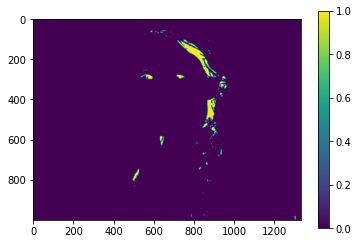

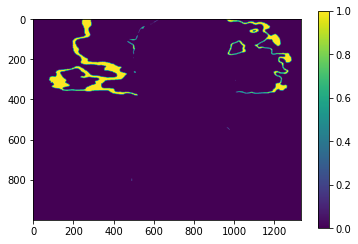

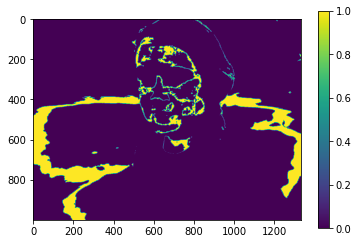

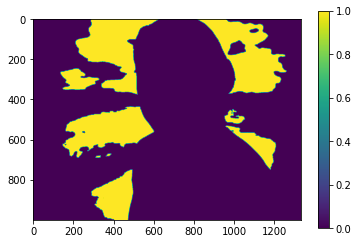

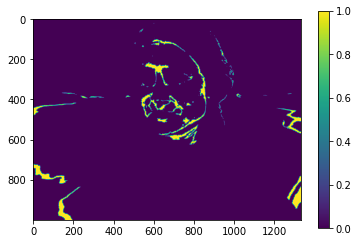

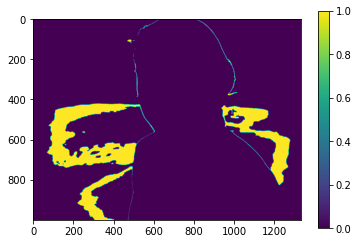

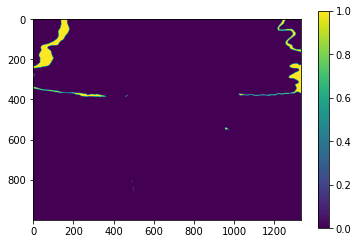

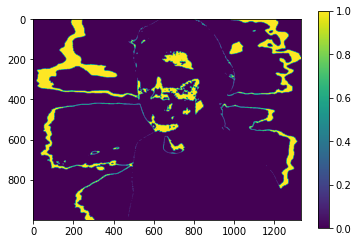

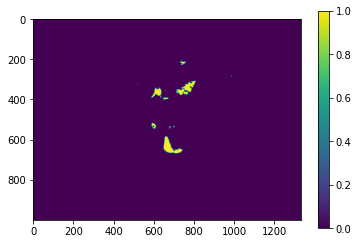

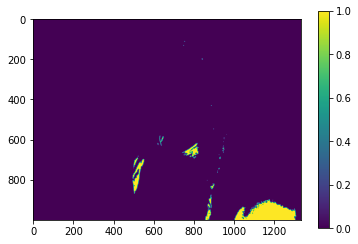

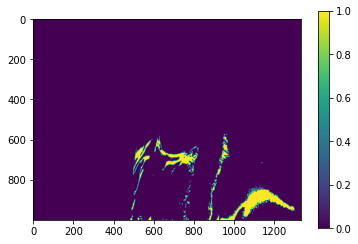

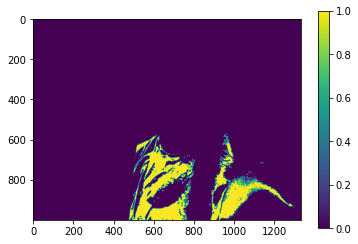

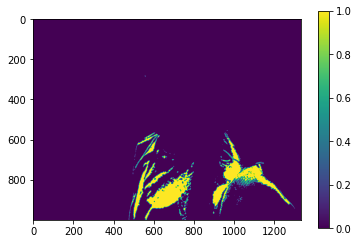

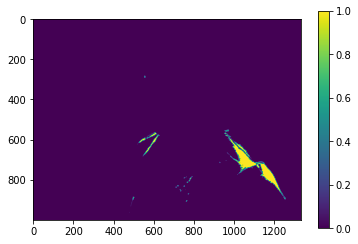

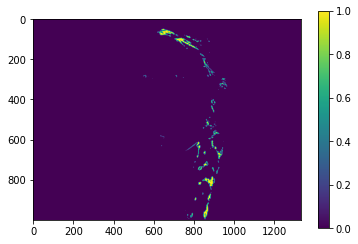

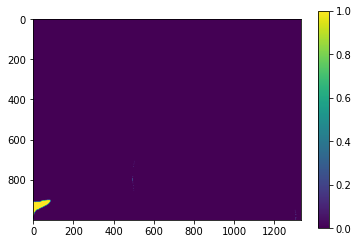

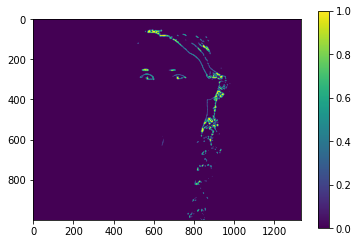

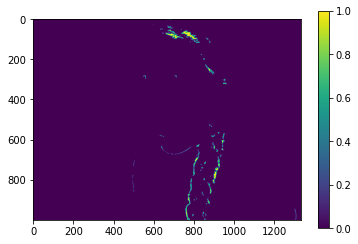

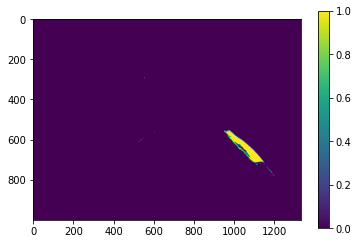

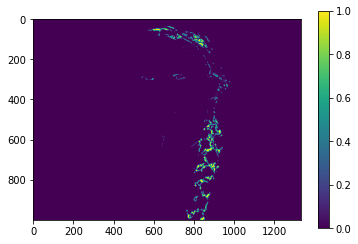

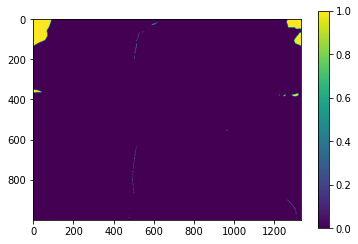

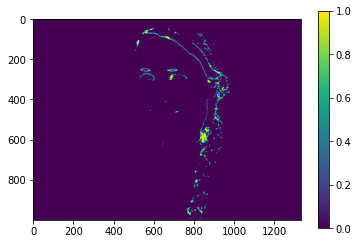

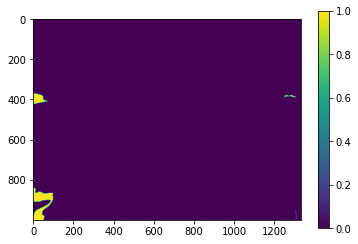

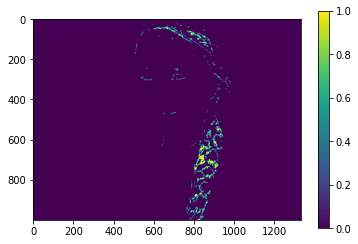

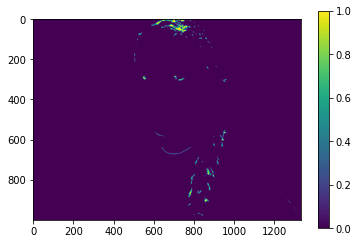

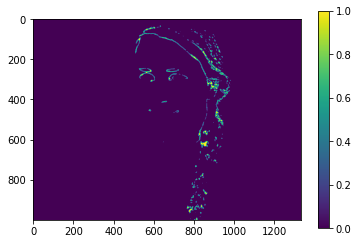

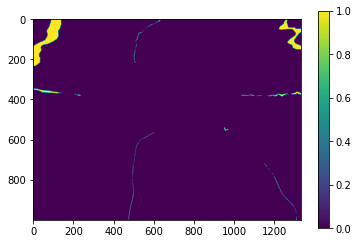

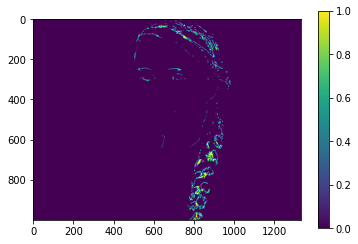

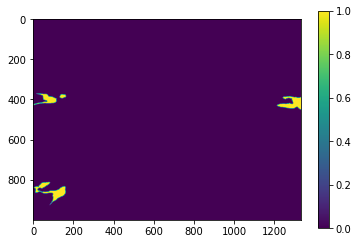

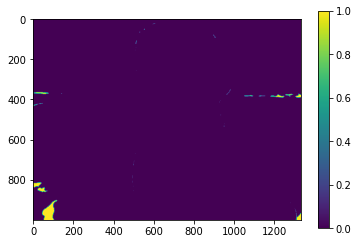

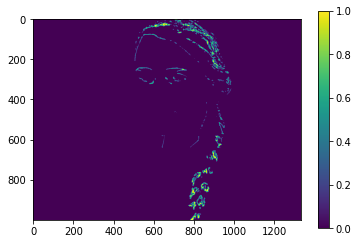

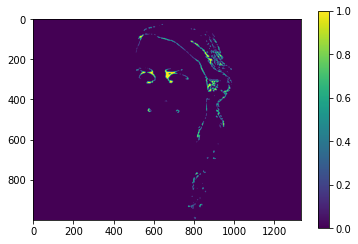

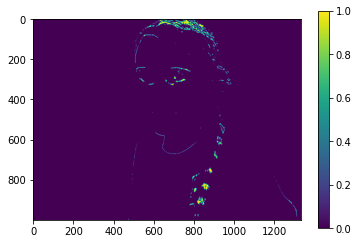

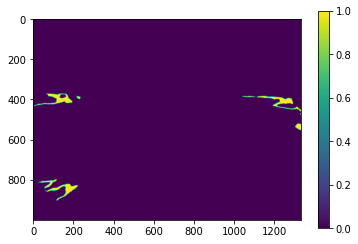

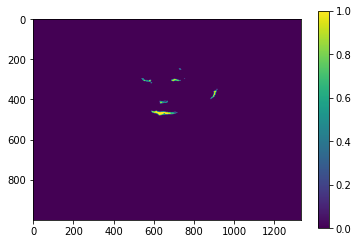

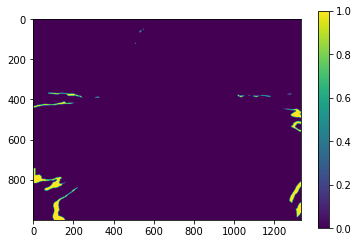

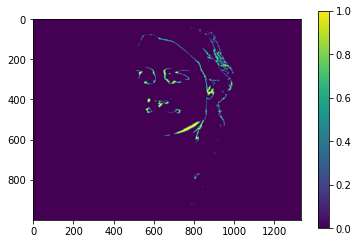

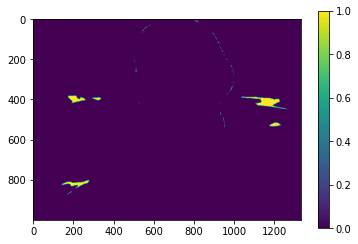

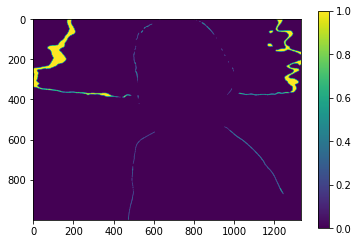

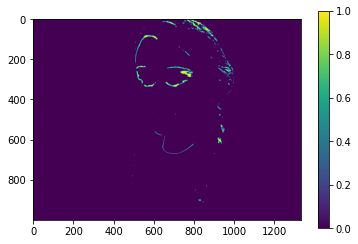

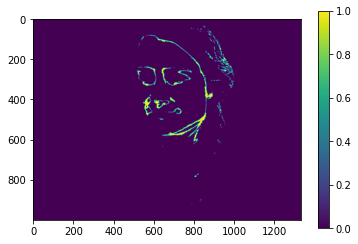

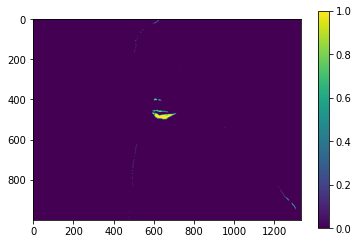

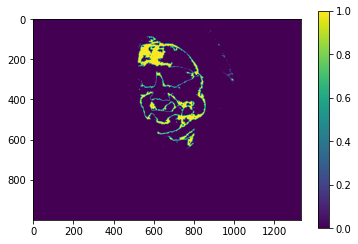

In [24]:
mask = np.ones(full_seg.shape, dtype=np.uint8) * 255

for _index in sorted_key_dict:
    #_index = 18
    mask_index = create_mask(full_seg, sorted_key_dict[_index])
    display_image(mask_index)
    mask = mask_contours(mask_index, mask)
    
save_image(mask, "mask.png")

# closing thoughts - blur to remove the really thin lines, then do something like a logical not to get the original crisp lines
# perform number placement with each original binary component, that way labels dont end up conflicting
# nice work!
# also export individual drawing guides...

In [312]:
sz = 4
seg_resize = cv2.resize(full_seg, dsize=(sz*full_seg.shape[1], sz*full_seg.shape[0]), interpolation=cv2.INTER_NEAREST)
save_image(natural_color(seg_resize), "seg_resize_v4.png")

In [43]:
def contour_composite(_orig_img, _color_dict):

    mask = np.ones(_orig_img.shape, dtype=np.uint8) * 255

    for _index in _color_dict:
        mask_index = create_mask(_orig_img, _color_dict[_index])
        mask = mask_contours(mask_index, mask)

    return mask

composite = contour_composite(seg_resize, sorted_key_dict)

In [44]:
save_image(composite, "composite_{}.png".format(sz))

In [161]:
def buffer_mask(_mask, buffer=3):
    mask_255 = _mask * 255
    mask_255_blur = cv2.blur(mask_255, (buffer, buffer))
    mask_255_blur[mask_255_blur>0]=1
    return mask_255_blur

def clean_mask(_mask, neg_buff=3, pos_buff=3):
    mask_invert = invert(_mask)
    mask_invert_buff = buffer_mask(mask_invert, neg_buff)
    mask_neg_buff = invert(mask_invert_buff)
    mask_neg_buff_pos_buff = buffer_mask(mask_neg_buff, pos_buff)
    return np.logical_and(_mask, mask_neg_buff_pos_buff)

_num = 14
mask_to_clean = create_mask(full_seg, sorted_key_dict[_num])
mask_cleaned = clean_mask(mask_to_clean)
save_image(mask_to_clean*255, "mask_to_clean_1{}.png".format(_num))
save_image(mask_cleaned*255, "mask_cleaned_1{}.png".format(_num))

In [292]:
def smooth_mask(_m, factor):
    _m_255 = _m * 255
    _m_255_blur = cv2.blur(_m_255, (factor, factor))
    _m_255_blur[_m_255_blur*2<=255] = 0
    _m_255_blur[_m_255_blur*2>255] = 1
    return _m_255_blur

In [333]:
def clean_contour_composite(_orig_img, _color_dict):

    master_mask = np.ones(_orig_img.shape, dtype=np.uint8) * 255

    count = 0
    
    for _index in _color_dict:
        count+=1
        _index_mask = create_mask(_orig_img, _color_dict[_index])
        _smooth_index_mask = smooth_mask(_index_mask, 10)
        #_line_mask = clean_mask(_smooth_index_mask, 1, 1)
        #_label_mask = clean_mask(_line_mask, , 20)
        master_mask = mask_contours(_smooth_index_mask, master_mask, _index, 250)#, label=False)
        #master_mask = label_contours(_label_mask, master_mask, _index, 100000)
        #if count > 15: break

    return master_mask

clean_composite = clean_contour_composite(seg_resize, sorted_key_dict)

In [334]:
save_image(clean_composite, "clean_composite_labeled_thin_{}.png".format(sz))

In [368]:
def mask_to_rgb(_orig_img, _color_dict):

    master_mask = np.zeros(_orig_img.shape, dtype=np.uint8)
    
    for _index, _color in _color_dict.items():
        if _color == (0, 0, 0): _color = (1, 1, 1)
        _index_mask = create_mask(_orig_img, _color_dict[_index])
        _smooth_index_mask = smooth_mask(_index_mask, 10)[:, :, np.newaxis]
        master_mask = np.where(master_mask==[0, 0, 0], _smooth_index_mask * list(_color), master_mask)
    
    return master_mask

smooth_rgb = mask_to_rgb(seg_resize, sorted_key_dict)

In [370]:
save_image(smooth_rgb, "smooth_rgb.png")

In [438]:
def interpolate_empty_pixels(_img, _empty_px=[0, 0, 0]):
    _num=0
    a = _img.copy()
    a = np.ma.masked_array(a,a==_empty_px)
    while [0, 0, 0] in np.array(a.reshape(-1, a.shape[2])):
        _num+=1
        for shift in (-1,1):
            for axis in (0,1):        
                a_shifted=np.roll(a,shift=shift,axis=axis)
                idx=~a_shifted.mask * a.mask
                a[idx]=a_shifted[idx]
        print("interpolate pixel iteration: {}".format(_num))
    return a

def replace_color(array, initial, final):
    r1, g1, b1 = initial
    r2, g2, b2 = final
    red, green, blue = array[:,:,0], array[:,:,1], array[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    array[:,:,:3][mask] = [r2, g2, b2]

a = interpolate_empty_pixels(_img=smooth_rgb)
a = np.array(a)
replace_color(a, [1, 1, 1], [0, 0, 0])
save_image(a, "a.png")

interpolate pixel iteration: 1
interpolate pixel iteration: 2
interpolate pixel iteration: 3
interpolate pixel iteration: 4
interpolate pixel iteration: 5
interpolate pixel iteration: 6
interpolate pixel iteration: 7
interpolate pixel iteration: 8
interpolate pixel iteration: 9
interpolate pixel iteration: 10
interpolate pixel iteration: 11
interpolate pixel iteration: 12


In [528]:
def contour_composite(_img, _color_dict):
    master_mask = np.ones(_img.shape, dtype=np.uint8) * 255
    for _index in _color_dict:
        _index_mask = create_mask(_img, _color_dict[_index])
        master_mask = mask_contours(_index_mask, master_mask, _index, 250)
    return master_mask

_c = contour_composite(a, sorted_key_dict)

In [529]:
save_image(_c, "c8.png")

In [442]:
# testing random index function
def random_index(_mask):
    x,y = np.where(_mask==1)
    i = np.random.randint(len(x))
    return (x[i], y[i])
    
for _index in sorted_key_dict:
    _index_mask = create_mask(a, sorted_key_dict[_index])
    random_index(_index_mask)
    print(_index_mask[1069, 3545])
    break

[3913, 3151]
1


In [665]:
def build_colormap(colordict):
    """
    Builds the colormap legend
    args:
        colordict[dict] {color_id: (r, g, b)}
    returns:
        colormap_array[np.Array]
    """
    
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = outline_width = 1
    font_color = outline_color = (0, 0, 0)
    row_gap = outline_gap = 2
    next_element_gap = 15
    row_height = 30
    color_patch_width = 50
    id_label_characters = 2
    rgb_label_characters = 13
    id_label_width = int(font_scale * 20 * id_label_characters)
    rgb_label_width = int(font_scale * 20 * rgb_label_characters)
    color_patch_height = row_height - (row_gap * 2) - (outline_gap * 2)
    label_y_bottom = int(row_height * 2/3)
    outline_x_left = id_label_width + next_element_gap
    color_x_left = outline_x_left + outline_gap
    color_x_right = color_x_left + color_patch_width
    outline_x_right = color_x_right + outline_gap
    outline_y_top = row_gap
    color_y_top = outline_y_top + outline_gap
    color_y_bottom = color_y_top + color_patch_height
    outline_y_bottom = color_y_bottom + outline_gap
    rgb_label_x_left = outline_x_right + next_element_gap
    
    total_height = row_height * len(colordict)
    total_width = rgb_label_x_left + rgb_label_width
    
    colormap_array = 255 * np.ones(
        (
            total_height,
            total_width,
            3
        ),
        dtype="uint8"
    )

    iteration = -1
    
    for color_id, color_rgb in colordict.items():
        
        iteration += 1
        color_rgb_int = (
            int(color_rgb[0]),
            int(color_rgb[1]),
            int(color_rgb[2]),
        )
        row_y_top = row_height * iteration
        
        cv2.putText( # color id label
            img=colormap_array,
            text=str(color_id),
            org=(
                0,
                row_y_top + label_y_bottom,
            ),
            fontFace=font_face,
            fontScale=font_scale,
            color=font_color,
            thickness=font_thickness,
        )
        cv2.rectangle( # outline rectangle
            img=colormap_array,
            pt1=(
                outline_x_left,
                row_y_top + outline_y_top,
            ),
            pt2=(
                outline_x_right,
                row_y_top + outline_y_bottom,
            ),
            color=outline_color,
            thickness=outline_width,
        )
        cv2.rectangle( # color rectangle
            img=colormap_array,
            pt1=(
                color_x_left,
                row_y_top + color_y_top,
            ),
            pt2=(
                color_x_right,
                row_y_top + color_y_bottom,
            ),
            color=color_rgb_int,
            thickness=-1, #fill in
        )
        cv2.putText( # rgb label
            img=colormap_array,
            text=str(color_rgb),
            org=(
                rgb_label_x_left,
                row_y_top + label_y_bottom,
            ),
            fontFace=font_face,
            fontScale=font_scale,
            color=font_color,
            thickness=font_thickness,
        )
        
    return colormap_array

In [666]:
colormap = build_colormap(sorted_key_dict)
save_image(natural_color(colormap), "colormap_emily.png")